### Loads raw input volumetric data(numpy array) and convert to 2D images training format in HIGH and LOW folders
* input image -> WH
* output image -> WH

In [1]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import helpers as H
from tqdm import tqdm

#Root directory of the project
ROOT_DIR = os.path.abspath(".")
TRAIN_DATASET_PATH = os.path.join(ROOT_DIR, "dataset")

# Dataset directories
LOW_DIR = "singlecoil_train_3D_images_48x/low/"
HIGH_DIR = "singlecoil_train_3D_images_48x/high/"

LOW_DIR_PATH = os.path.join(TRAIN_DATASET_PATH, LOW_DIR)
HIGH_DIR_PATH = os.path.join(TRAIN_DATASET_PATH, HIGH_DIR)
#SAVE_DATA_PATH = os.path.join(TRAIN_DATASET_PATH, "singlecoil_train_3D_images_48x_normalized")
LOW_DIR_PATH, HIGH_DIR_PATH

('E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/low/',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/high/')

In [2]:
w, h = 128, 128
def rs_img(img):
    '''W and H is 128 now
    '''
    print(img.shape[-1])
    print(type(img.shape[-1]))
    flatten = [cv2.resize(img[:,:,i], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[-1])]
    img = np.array(np.dstack(flatten)) 
    return img


def change_depth(img):

    img_start = img[:,:,:4]
    
    mid = int(img.shape[-1]/2)
    img_middle = img[:,:,mid-10:mid+10]
    
    img_end = img[:,:,-4:]
    img = np.concatenate((img_start, img_middle, img_end), axis=2)
    return img


def show_slices(data, slice_nums, cmap=None):
    data = np.moveaxis(data, 2, 0)
    fig = plt.figure(figsize=(16, 16))
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)        

#### Check number of contents

In [3]:
len(os.listdir(LOW_DIR_PATH)), len(os.listdir(HIGH_DIR_PATH))

(973, 973)

In [4]:
low_full_paths = ["{}/{}".format(LOW_DIR_PATH,l) for l in H.sort_paths(os.listdir(LOW_DIR_PATH))]
high_full_paths = ["{}/{}".format(HIGH_DIR_PATH,h) for h in H.sort_paths(os.listdir(HIGH_DIR_PATH))]

len(low_full_paths), len(high_full_paths)

(973, 973)

In [5]:
low_full_paths[:4]

['E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/low//1.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/low//2.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/low//3.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/low//4.npy']

In [6]:
high_full_paths[:4]

['E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/high//1.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/high//2.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/high//3.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/high//4.npy']

In [7]:
# Make folder for low and high res

LOW_DIR_2D = "singlecoil_train_2D_images_normalized/low/"
HIGH_DIR_2D = "singlecoil_train_2D_images_normalized/high/"

H.create_directory("{}/{}".format(TRAIN_DATASET_PATH, LOW_DIR_2D))
H.create_directory("{}/{}".format(TRAIN_DATASET_PATH, HIGH_DIR_2D))

In [8]:
LOW_DIR_2D_PATH = os.path.join(TRAIN_DATASET_PATH, LOW_DIR_2D)
HIGH_DIR_2D_PATH = os.path.join(TRAIN_DATASET_PATH, HIGH_DIR_2D)
LOW_DIR_2D_PATH, HIGH_DIR_2D_PATH

('E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_2D_images_normalized/low/',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_2D_images_normalized/high/')

#### Low MRI 3D to 2D image slices

(Each slice from the volumetric data is normalized, NOT the whole volumetric data at once.)

In [9]:
c=0
total_slices = 0

for l in tqdm(low_full_paths[:]):
    img_3d = np.load("{}".format(l))
    img_3d = np.moveaxis(img_3d, 0, 2)
    slices = img_3d.shape[-1]
    total_slices+=slices
    
    # iterate over each slice and save
    for i in range(slices):
        img = img_3d[:,:,i]
        img = H.normalize(img) # Normalize image
        cv2.imwrite("{}/{}_{}.png".format(LOW_DIR_2D_PATH, c, i), img * 255)
        img = None
        
    img_3d = None
    c+=1
    
print("Total slices: {}".format(total_slices))

100%|████████████████████████████████████████████████████████████████████████████████| 973/973 [09:15<00:00,  2.07it/s]


Total slices: 34742


#### HIGH MRI VOLUMES

In [10]:
c=0
total_slices = 0

for l in tqdm(high_full_paths[:]):
    img_3d = np.load("{}".format(l))
    img_3d = np.moveaxis(img_3d, 0, 2)
    slices = img_3d.shape[-1]
    total_slices+=slices
    
    # iterate over each slice and save
    for i in range(slices):
        img = img_3d[:,:,i]
        img = H.normalize(img) # Normalize image
        cv2.imwrite("{}/{}_{}.png".format(HIGH_DIR_2D_PATH, c, i), img * 255)
        img = None
        
    img_3d = None
    c+=1
    
print("Total slices: {}".format(total_slices))

100%|████████████████████████████████████████████████████████████████████████████████| 973/973 [09:56<00:00,  1.50it/s]


Total slices: 34742



### Remember to rescale using img/255.0 after loading images

`img = cv2.imread("test.png", 0)
img = x/255.0 # Rescale to 0-1
`


In [11]:
len(os.listdir(LOW_DIR_2D_PATH)), len(os.listdir(HIGH_DIR_2D_PATH))

(34742, 34742)

### Load and check saved image

In [12]:
img_test = cv2.imread("{}/{}".format(HIGH_DIR_2D_PATH, "0_23.png"), 0) / 255.0
img_test.shape

(320, 320)

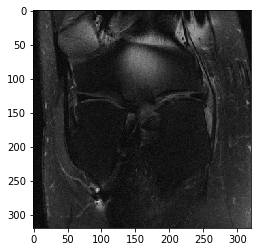

In [13]:
plt.imshow(img_test, cmap='gray')

In [14]:
img_test

array([[0.05882353, 0.05098039, 0.07058824, ..., 0.04313725, 0.08235294,
        0.02745098],
       [0.10196078, 0.06666667, 0.03921569, ..., 0.03137255, 0.07058824,
        0.04705882],
       [0.05098039, 0.06666667, 0.05882353, ..., 0.05490196, 0.03921569,
        0.0745098 ],
       ...,
       [0.03921569, 0.05490196, 0.05490196, ..., 0.31372549, 0.34901961,
        0.34901961],
       [0.03921569, 0.05098039, 0.04705882, ..., 0.30588235, 0.36470588,
        0.38039216],
       [0.04705882, 0.04313725, 0.09803922, ..., 0.30588235, 0.3372549 ,
        0.32156863]])

In [16]:
flat = img_test.flatten()
min(flat), max(flat)

(0.0, 1.0)

### During test time:
* load from *.h5 files and convert and save to npy
* for each npy file
    make folder of npy file name
    convert each slice and save in folder
* Now we have X number of test volume folders which have all slices
* Run 2D model on each folder(npy file) and reconstruct output volume

In [17]:
print("Done!")

Done!
